# AutoRec cs3639 Recommendation Systems course IDC

### here will be general explanations

In [1]:
import numpy as np
import pandas as pd
import sklearn
import torch
from torch import nn

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


## datasets

In this project, we will use 2 datasets:
* **movielens**, which can be downloaded using `utils.datasets_download.py` or straight from [here](http://files.grouplens.org/datasets/movielens/).
* **netflixprize**, which can be downloaded from this [semi-parsed version from kaggle](https://www.kaggle.com/netflix-inc/netflix-prize-data) or from this [raw version](https://archive.org/download/nf_prize_dataset.tar)

**NOTE**: for the notebook to run properly, you should save you dataset under `data` folder and `movielens` folder for the movielens dataset and `netflix` folder for the netflixprize dataset.
i.e `data/movielens` folder and `data/netflix` folder respectively.

# Matrix Factorization

In [3]:
from src.mf.model import MatrixFactorization
from src.mf.training import MFTrainer

In [4]:
from src.data_prep import movielens_load
train, test = movielens_load(1)
print(train.shape)
train

(80000, 4)


,user_id,item_id,rating,timestamp
0,0,0,5,874965758
1,0,1,3,876893171
2,0,2,4,878542960
3,0,3,3,876893119
4,0,4,3,889751712
...,...,...,...,...
79995,942,1066,2,875501756
79996,942,1073,4,888640250
79997,942,1187,3,888640250
79998,942,1227,3,888640275


In [9]:
model_dict = {}
num_users = train.user_id.max() + 1
num_items = train.item_id.max() + 1
model = MatrixFactorization(num_users, num_items, k=400)
mf_trainer = MFTrainer(train, test, model, epochs=3, lr=0.002, reg=0.001, batch_size=128)

In [8]:
mf_trainer.train_model()
model_dict['model_params'] = model.params()
model_dict.update(mf_trainer.params())
model_dict['train_losses'] = mf_trainer.train_losses
model_dict['val_losses'] = mf_trainer.val_losses

{'model_params': {'k': 400},
 'seed': 14,
 'epochs': 3,
 'reg': 0.001,
 'batch_size': 128,
 'lr': 0.002,
 'train_losses': [[20.025707244873047,
   20.78900146484375,
   19.3085880279541,
   20.613014221191406,
   19.655778884887695,
   20.8173770904541,
   21.357080459594727,
   18.337854385375977,
   19.692352294921875,
   19.65153694152832,
   18.696327209472656,
   18.92147445678711,
   18.687599182128906,
   20.458242416381836,
   19.7835636138916,
   19.21735191345215,
   18.653093338012695,
   20.40091323852539,
   18.97611427307129,
   18.00206184387207,
   18.823671340942383,
   20.84845542907715,
   20.41351318359375,
   17.884193420410156,
   17.981128692626953,
   20.35440444946289,
   21.284791946411133,
   19.06101417541504,
   19.00554847717285,
   19.834638595581055,
   17.74853515625,
   19.281003952026367,
   18.63945198059082,
   16.783611297607422,
   19.765445709228516,
   18.010581970214844,
   17.983922958374023,
   16.706724166870117,
   18.280370712280273,
   19

In [25]:
import json
from time import time
epochs = 2
batch_size = 128

for k in [40, 100, 400]:
    for lr in [0.001, 0.003]:
        for reg in [0.001, 0.003]:
            print(f'STARTING TRAIN MF with k: {k}, lr: {lr}, reg: {reg}')
            start_time = time()
            model_dict = {}
            num_users = train.user_id.max() + 1
            num_items = train.item_id.max() + 1

            # Init model and trainer
            model = MatrixFactorization(num_users, num_items, k=k)
            mf_trainer = MFTrainer(train, test, model, epochs=epochs, lr=lr, reg=reg, batch_size=batch_size)

            mf_trainer.train_model()

            # Save parmas to model_dict
            model_dict['model_params'] = model.params()
            model_dict.update(mf_trainer.params())
            model_dict['train_losses'] = mf_trainer.train_losses
            model_dict['val_losses'] = mf_trainer.val_losses

            file_name = f'models_params/MF_{k}_{lr}_{reg}'
            with open(file_name, 'w') as f:
                json.dump(model_dict, f, indent=4)

            print(f'model train time: {time() - start_time:.3f}\n')



STARTING TRAIN MF with k: 40, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 5.079, val: 3.975
EPOCH 2: Avg losses: train: 3.299, val: 2.542
model train time: 2.098

STARTING TRAIN MF with k: 40, lr: 0.001, reg: 0.003
EPOCH 1: Avg losses: train: 4.474, val: 3.007
EPOCH 2: Avg losses: train: 2.192, val: 1.472
model train time: 1.820

STARTING TRAIN MF with k: 40, lr: 0.003, reg: 0.001
EPOCH 1: Avg losses: train: 3.387, val: 1.593
EPOCH 2: Avg losses: train: 1.061, val: 0.758
model train time: 1.865

STARTING TRAIN MF with k: 40, lr: 0.003, reg: 0.003
EPOCH 1: Avg losses: train: 2.574, val: 0.896
EPOCH 2: Avg losses: train: 0.737, val: 0.697
model train time: 1.946

STARTING TRAIN MF with k: 100, lr: 0.001, reg: 0.001
EPOCH 1: Avg losses: train: 8.078, val: 6.274
EPOCH 2: Avg losses: train: 5.205, val: 3.998
model train time: 2.537

STARTING TRAIN MF with k: 100, lr: 0.001, reg: 0.003
EPOCH 1: Avg losses: train: 7.110, val: 4.669
EPOCH 2: Avg losses: train: 3.380, val: 2.156
model tra

KeyboardInterrupt: 

In [19]:
import json
d = {'1':1,'2':[1,2,3,4]}
with open('models_params/test', 'w') as fp:
    json.dump(d, fp, indent=4)

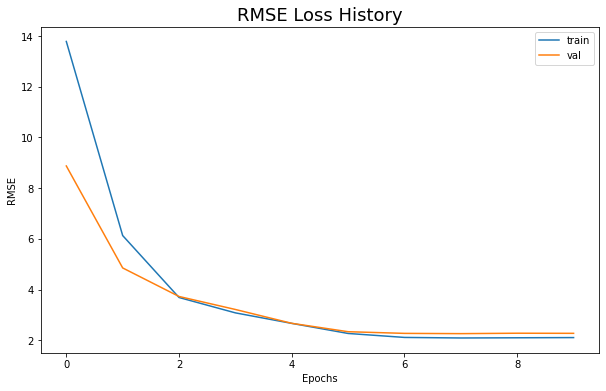

In [28]:
from utils.plots import plot_train_history
plot_train_history(mf_trainer.train_losses, mf_trainer.val_losses)

# AutoRec

In [29]:
from src.data_prep import movielens_create_ratings
train, test = movielens_create_ratings(1)
train

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,5,3,4,3,3,0,4,1,5,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
939,0,0,0,2,0,0,4,5,3,0,...,0,0,0,0,0,0,0,0,0,0
940,5,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
from src.autorec.model import AutoRec
from src.autorec.training import AutoRecTrainer

In [31]:
num_users, num_items = train.shape
model = AutoRec(num_hidden=512, num_features=num_users)

In [34]:
autorec_trainer = AutoRecTrainer(train, test, model, epochs=60, batch_size=64, lr=0.001, reg=0.001)
autorec_trainer.train_model()

EPOCH 1: Avg losses: train: 0.608, val: 0.776
EPOCH 2: Avg losses: train: 0.585, val: 0.771
EPOCH 3: Avg losses: train: 0.574, val: 0.784
EPOCH 4: Avg losses: train: 0.574, val: 0.765
EPOCH 5: Avg losses: train: 0.573, val: 0.765
EPOCH 6: Avg losses: train: 0.570, val: 0.764
EPOCH 7: Avg losses: train: 0.571, val: 0.759
EPOCH 8: Avg losses: train: 0.568, val: 0.761
EPOCH 9: Avg losses: train: 0.565, val: 0.752
EPOCH 10: Avg losses: train: 0.564, val: 0.761
EPOCH 11: Avg losses: train: 0.564, val: 0.757
EPOCH 12: Avg losses: train: 0.560, val: 0.753
EPOCH 13: Avg losses: train: 0.555, val: 0.752
EPOCH 14: Avg losses: train: 0.558, val: 0.754
EPOCH 15: Avg losses: train: 0.557, val: 0.777
EPOCH 16: Avg losses: train: 0.556, val: 0.749
EPOCH 17: Avg losses: train: 0.553, val: 0.755
EPOCH 18: Avg losses: train: 0.553, val: 0.739
EPOCH 19: Avg losses: train: 0.550, val: 0.745
EPOCH 20: Avg losses: train: 0.549, val: 0.753
EPOCH 21: Avg losses: train: 0.546, val: 0.753
EPOCH 22: Avg losses: 

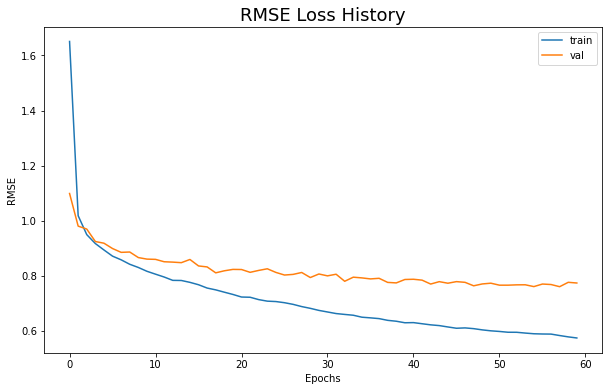

In [33]:
from utils.plots import plot_train_history
plot_train_history(autorec_trainer.train_losses, autorec_trainer.val_losses)